In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix
from datetime import datetime as dt

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("airline-passengers.csv")

In [3]:
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


,Passengers,Passengers_SMA
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,122.4
1949-07-01,148,127.0
1949-08-01,148,133.0
1949-09-01,136,136.2


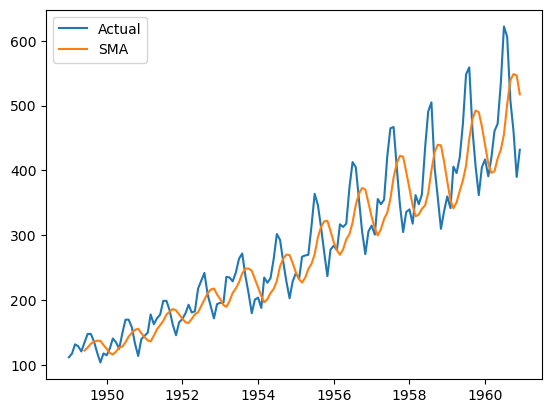

In [5]:
window = 5
df["Passengers_SMA"] = df["Passengers"].rolling(window, closed="left").mean()
display(df.head(10))

plt.plot(df["Passengers"], label="Actual")
plt.plot(df["Passengers_SMA"], label="SMA")
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


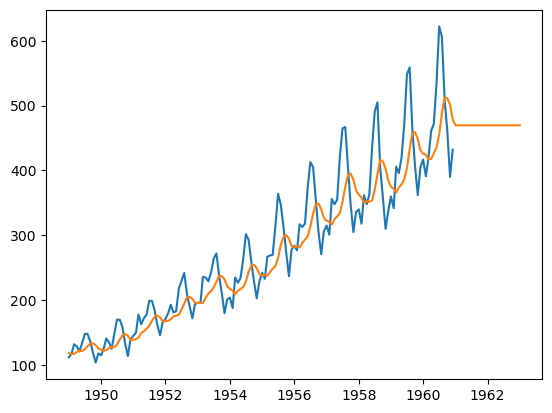

In [36]:
model = sm.tsa.ExponentialSmoothing(df["Passengers"])
model_fitted = model.fit(smoothing_level=0.2, optimized=False)
x = model_fitted.predict(start=dt(1949, 1, 1), end=dt(1962, 12, 31)).rename("alpha=0.2")

plt.plot(df["Passengers"])
plt.plot(x)